<a href="https://colab.research.google.com/github/santiagoahl/Data-transformation-and-manipulation/blob/main/combining_dataframes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Merge, Join and Concat

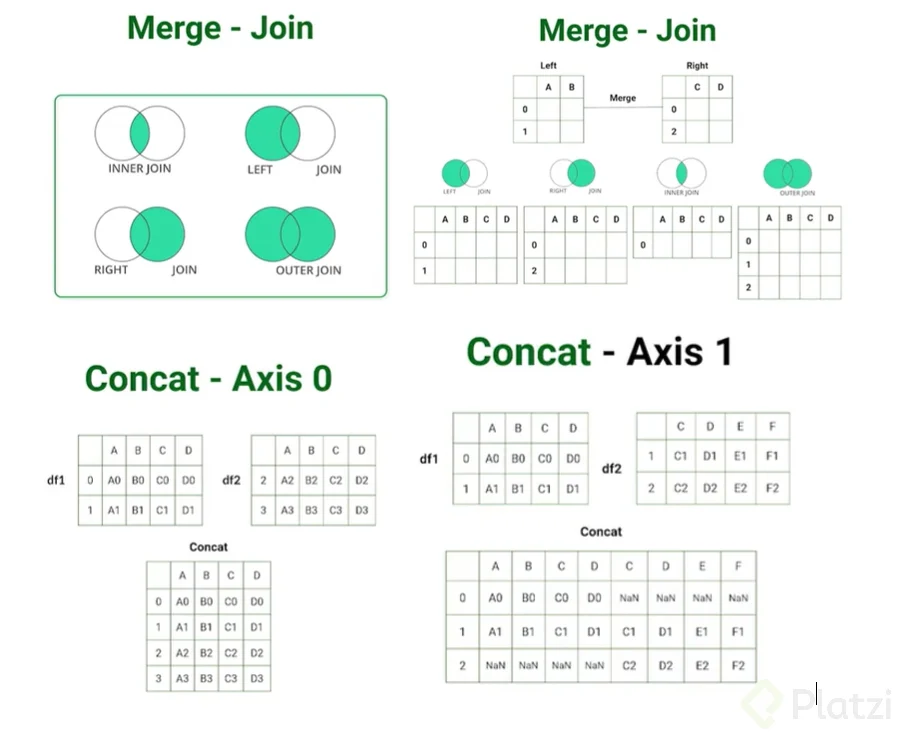

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_1 = pd.DataFrame({'A':['A0','A1','A2','A3'],
        'B':['B0','B1','B2','B3'],
        'C':['C0','C1','C2','C3'],
        'D':['D0','D1','D2','D3']
        })
df_1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [ ]:
df_2 = pd.DataFrame({'A':['A4','A5','A6','A7'],
        'B':['B4','B5','B6','B7'],
        'C':['C4','C5','C6','C7'],
        'D':['D4','D5','D6','D7']
        })
df_2

,A,B,C,D
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


## Concat

In [ ]:
row_concat = pd.concat([df_1, df_2], ignore_index=True) #More recurrent
row_concat

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [ ]:
column_concat = pd.concat([df_1, df_2], axis=1, ignore_index=True)
column_concat

,0,1,2,3,4,5,6,7
0,A0,B0,C0,D0,A4,B4,C4,D4
1,A1,B1,C1,D1,A5,B5,C5,D5
2,A2,B2,C2,D2,A6,B6,C6,D6
3,A3,B3,C3,D3,A7,B7,C7,D7


## Merge

In [ ]:
left = pd.DataFrame({'key':['k0','k1','k2','k3'],
    'A':['A4','A5','A6','A7'],
    'B':['B4','B5','B6','B7']
      })
left

,key,A,B
0,k0,A4,B4
1,k1,A5,B5
2,k2,A6,B6
3,k3,A7,B7


In [ ]:
right = pd.DataFrame({'key':['k0','k1','k2','k3'],
    'C':['C4','C5','C6','C7'],
    'D':['D4','D5','D6','D7']
      })
right

,key,C,D
0,k0,C4,D4
1,k1,C5,D5
2,k2,C6,D6
3,k3,C7,D7


In [ ]:
left.merge(right, on = 'key')

,key,A,B,C,D
0,k0,A4,B4,C4,D4
1,k1,A5,B5,C5,D5
2,k2,A6,B6,C6,D6
3,k3,A7,B7,C7,D7


In [ ]:
#What if there's no common key?
left = pd.DataFrame({'key':['k0','k1','k2','k3'],
    'A':['A4','A5','A6','A7'],
    'B':['B4','B5','B6','B7']
      })
right = pd.DataFrame({'key2':['k0','k1','k2','k3'],
    'C':['C4','C5','C6','C7'],
    'D':['D4','D5','D6','D7']
      })

In [ ]:
left.merge(right, left_on = 'key', right_on = 'key2')

,key,A,B,key2,C,D
0,k0,A4,B4,k0,C4,D4
1,k1,A5,B5,k1,C5,D5
2,k2,A6,B6,k2,C6,D6
3,k3,A7,B7,k3,C7,D7


In [ ]:
#What if there's no common key?
left = pd.DataFrame({'key':['k0','k1','k2','k3'],
    'A':['A4','A5','A6','A7'],
    'B':['B4','B5','B6','B7']
      })
right = pd.DataFrame({'key2':['k0','k1','k2',np.nan],
    'C':['C4','C5','C6','C7'],
    'D':['D4','D5','D6','D7']
      })
right

,key2,C,D
0,k0,C4,D4
1,k1,C5,D5
2,k2,C6,D6
3,NaN,C7,D7


In [ ]:
left.merge(right, left_on = 'key', right_on = 'key2')

,key,A,B,key2,C,D
0,k0,A4,B4,k0,C4,D4
1,k1,A5,B5,k1,C5,D5
2,k2,A6,B6,k2,C6,D6


In [ ]:
left.merge(right, left_on = 'key', right_on = 'key2', how='left')

,key,A,B,key2,C,D
0,k0,A4,B4,k0,C4,D4
1,k1,A5,B5,k1,C5,D5
2,k2,A6,B6,k2,C6,D6
3,k3,A7,B7,NaN,NaN,NaN


In [ ]:
left.merge(right, left_on = 'key', right_on = 'key2', how='right')

,key,A,B,key2,C,D
0,k0,A4,B4,k0,C4,D4
1,k1,A5,B5,k1,C5,D5
2,k2,A6,B6,k2,C6,D6
3,NaN,NaN,NaN,NaN,C7,D7


## Join - Index match

In [ ]:
left = pd.DataFrame({'A':['A5','A6','A7'],
    'B':['B5','B6','B7']
      },index = ['k0','k1','k2'])
right = pd.DataFrame({'C':['C5','C6','C7'],
    'D':['D5','D6','D7']
      }, index = ['k0','k2','k3'])
right

,C,D
k0,C5,D5
k2,C6,D6
k3,C7,D7


In [ ]:
left.join(right)

,A,B,C,D
k0,A5,B5,C5,D5
k1,A6,B6,NaN,NaN
k2,A7,B7,C6,D6


In [ ]:
left.join(right, how = 'inner')

,A,B,C,D
k0,A5,B5,C5,D5
k2,A7,B7,C6,D6
